# Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Scaling the data
from sklearn.preprocessing import StandardScaler

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import *
from imblearn.metrics import *

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import RFECV

In [ ]:
pd.set_option('display.max_columns',None)

# Data Import

In [ ]:
data= pd.read_csv('ovarian_cancer_pre_mean.csv')

In [ ]:
data

Unnamed: 0        AFP     AG   Age     ALB         ALP        ALT    AST  \
0             0   3.580000  19.36  47.0  45.400   56.000000  11.000000  24.00   
1             1   1.500000  18.40  39.0  45.400   77.000000   9.000000  18.00   
2             2   2.360000  19.97  45.0  35.000   47.000000  21.000000  27.00   
3             3   3.790000  17.39  44.0  32.900  118.000000  51.000000  32.00   
4             4  16.260415  21.87  53.0  41.745   71.704545  17.781818  17.55   
..          ...        ...    ...   ...     ...         ...        ...    ...   
225         225   3.270000  21.32  43.0  48.600   60.000000  30.000000  16.00   
226         226   2.090000  20.91  52.0  48.600   65.000000  40.000000  30.00   
227         227   2.000000  12.14  37.0  46.100   49.000000   9.000000  20.00   
228         228   1.840000  27.22  30.0  47.800   64.000000  26.000000  22.00   
229         229   1.610000  13.00  39.0  44.900   68.000000   7.000000  13.00   

     BASO#  BASO%   BUN    Ca        CA125     CA19-9    CA72-4       CEA  \
0     0.01   0.30  5.35  2.48    15.360000  36.480000  6.420000  1.400000   
1     0.03   0.60  3.80  2.57    56.080000  12.180000  5.425641  0.770000   
2     0.01   0.10  4.89  2.48  1391.000000  11.150000  5.425641  0.420000   
3     0.02   0.42  4.47  2.49    55.970000  22.570000  0.740000  1.330000   
4     0.02   0.50  2.60  2.24   155.584201  44.383256  5.425641  3.530783   
..     ...    ...   ...   ...          ...        ...       ...       ...   
225   0.03   0.50  4.86  2.58    13.610000   8.370000  5.425641  0.590000   
226   0.00   0.00  4.29  2.81    50.800000  15.110000  5.425641  1.740000   
227   0.00   0.00  3.12  2.29    21.930000   0.620000  5.425641  1.670000   
228   0.03   0.30  3.61  2.82    53.870000  10.710000  5.425641  0.930000   
229   0.01   0.20  4.38  2.58    46.450000  28.790000  5.425641  0.760000   

        CL  CO2CP   CREA  DBIL   EO#   EO%        GGT        GLO  GLU.    HCT  \
0    107.4   19.9  103.0  2.00  0.04  1.00  16.000000  28.500000  4.67  0.273   
1    102.6   22.2   48.0  4.70  0.03  0.60  10.000000  32.500000  4.64  0.391   
2     99.6   26.2   70.3  2.20  0.11  1.60  24.000000  31.500000  4.07  0.383   
3     99.3   20.1   80.7  5.90  0.01  0.19  75.000000  39.400000  7.52  0.306   
4    103.2   21.3   44.0  3.18  0.06  1.50  20.018182  29.998636  7.10  0.421   
..     ...    ...    ...   ...   ...   ...        ...        ...   ...    ...   
225   96.5   24.6   67.0  2.90  0.06  1.10  29.000000  25.800000  4.39  0.440   
226   98.1   25.9   54.0  3.80  0.01  0.30  36.000000  31.800000  5.13  0.415   
227  103.6   25.0   67.0  5.90  0.02  0.30   9.000000  27.400000  4.59  0.285   
228   93.1   23.1   59.0  3.50  0.23  2.20  25.000000  28.200000  5.59  0.458   
229  101.7   29.5   69.0  2.70  0.04  0.80   8.000000  23.700000  4.94  0.376   

           HE4    HGB    IBIL     K  LYM#  LYM%   MCH    MCV    Mg  MONO#  \
0     91.62844   89.0   3.500  5.36  0.65  16.8  33.7  103.4  0.78   0.22   
1     47.56000  131.0  10.100  4.30  1.10  23.7  28.4   84.6  1.00   0.25   
2    404.90000  122.0   3.100  4.77  1.98  28.8  27.7   87.0  1.08   0.69   
3     49.95000   96.5   2.200  4.89  0.52  11.1  21.8   69.0  0.93   0.07   
4     91.62844  138.0   5.865  4.20  1.28  32.7  29.7   90.7  0.65   0.19   
..         ...    ...     ...   ...   ...   ...   ...    ...   ...    ...   
225   40.17000  147.0   4.800  4.12  1.36  24.3  30.4   91.1  0.94   0.21   
226   31.45000  142.0   6.900  4.11  1.18  30.7  31.1   91.0  0.94   0.28   
227   44.44000   80.0  11.300  3.64  1.39  23.3  18.9   67.2  0.77   0.32   
228   30.78000  154.0   7.800  4.22  2.15  20.6  28.8   85.6  1.02   0.43   
229   33.42000  128.0   5.600  4.30  1.52  32.0  31.0   91.0  0.93   0.30   

     MONO%    MPV     Na        NEU    PCT   PDW  PHOS    PLT   RBC   RDW  \
0     5.70  11.70  141.3  76.200000  0.090  13.4  1.46   74.0  2.64  13.7   
1     5.40  11.40  138.9  69.700000  0.130  15.2  0.97 

In [ ]:
data = data.drop(columns=['Unnamed: 0'])

In [ ]:
data.columns

Index(['AFP', 'AG', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'BASO#', 'BASO%', 'BUN',
       'Ca', 'CA125', 'CA19-9', 'CA72-4', 'CEA', 'CL', 'CO2CP', 'CREA', 'DBIL',
       'EO#', 'EO%', 'GGT', 'GLO', 'GLU.', 'HCT', 'HE4', 'HGB', 'IBIL', 'K',
       'LYM#', 'LYM%', 'MCH', 'MCV', 'Mg', 'MONO#', 'MONO%', 'MPV', 'Na',
       'NEU', 'PCT', 'PDW', 'PHOS', 'PLT', 'RBC', 'RDW', 'TBIL', 'TP', 'UA',
       'TYPE'],
      dtype='object')

In [ ]:
X = data.drop(columns=['TYPE'])
y = data['TYPE']

In [ ]:
y.value_counts()

TYPE
1.0    155
0.0     75
Name: count, dtype: int64

In [ ]:
label_mapping = {0: 1, 1: 0}
y = y.map(label_mapping)
y.value_counts()

TYPE
0    155
1     75
Name: count, dtype: int64

# Correlation Analysis

In [ ]:
dt= data
dt

AFP     AG   Age     ALB         ALP        ALT    AST  BASO#  \
0     3.580000  19.36  47.0  45.400   56.000000  11.000000  24.00   0.01   
1     1.500000  18.40  39.0  45.400   77.000000   9.000000  18.00   0.03   
2     2.360000  19.97  45.0  35.000   47.000000  21.000000  27.00   0.01   
3     3.790000  17.39  44.0  32.900  118.000000  51.000000  32.00   0.02   
4    16.260415  21.87  53.0  41.745   71.704545  17.781818  17.55   0.02   
..         ...    ...   ...     ...         ...        ...    ...    ...   
225   3.270000  21.32  43.0  48.600   60.000000  30.000000  16.00   0.03   
226   2.090000  20.91  52.0  48.600   65.000000  40.000000  30.00   0.00   
227   2.000000  12.14  37.0  46.100   49.000000   9.000000  20.00   0.00   
228   1.840000  27.22  30.0  47.800   64.000000  26.000000  22.00   0.03   
229   1.610000  13.00  39.0  44.900   68.000000   7.000000  13.00   0.01   

     BASO%   BUN    Ca        CA125     CA19-9    CA72-4       CEA     CL  \
0     0.30  5.35  2.48    15.360000  36.480000  6.420000  1.400000  107.4   
1     0.60  3.80  2.57    56.080000  12.180000  5.425641  0.770000  102.6   
2     0.10  4.89  2.48  1391.000000  11.150000  5.425641  0.420000   99.6   
3     0.42  4.47  2.49    55.970000  22.570000  0.740000  1.330000   99.3   
4     0.50  2.60  2.24   155.584201  44.383256  5.425641  3.530783  103.2   
..     ...   ...   ...          ...        ...       ...       ...    ...   
225   0.50  4.86  2.58    13.610000   8.370000  5.425641  0.590000   96.5   
226   0.00  4.29  2.81    50.800000  15.110000  5.425641  1.740000   98.1   
227   0.00  3.12  2.29    21.930000   0.620000  5.425641  1.670000  103.6   
228   0.30  3.61  2.82    53.870000  10.710000  5.425641  0.930000   93.1   
229   0.20  4.38  2.58    46.450000  28.790000  5.425641  0.760000  101.7   

     CO2CP   CREA  DBIL   EO#   EO%        GGT        GLO  GLU.    HCT  \
0     19.9  103.0  2.00  0.04  1.00  16.000000  28.500000  4.67  0.273   
1     22.2   48.0  4.70  0.03  0.60  10.000000  32.500000  4.64  0.391   
2     26.2   70.3  2.20  0.11  1.60  24.000000  31.500000  4.07  0.383   
3     20.1   80.7  5.90  0.01  0.19  75.000000  39.400000  7.52  0.306   
4     21.3   44.0  3.18  0.06  1.50  20.018182  29.998636  7.10  0.421   
..     ...    ...   ...   ...   ...        ...        ...   ...    ...   
225   24.6   67.0  2.90  0.06  1.10  29.000000  25.800000  4.39  0.440   
226   25.9   54.0  3.80  0.01  0.30  36.000000  31.800000  5.13  0.415   
227   25.0   67.0  5.90  0.02  0.30   9.000000  27.400000  4.59  0.285   
228   23.1   59.0  3.50  0.23  2.20  25.000000  28.200000  5.59  0.458   
229   29.5   69.0  2.70  0.04  0.80   8.000000  23.700000  4.94  0.376   

           HE4    HGB    IBIL     K  LYM#  LYM%   MCH    MCV    Mg  MONO#  \
0     91.62844   89.0   3.500  5.36  0.65  16.8  33.7  103.4  0.78   0.22   
1     47.56000  131.0  10.100  4.30  1.10  23.7  28.4   84.6  1.00   0.25   
2    404.90000  122.0   3.100  4.77  1.98  28.8  27.7   87.0  1.08   0.69   
3     49.95000   96.5   2.200  4.89  0.52  11.1  21.8   69.0  0.93   0.07   
4     91.62844  138.0   5.865  4.20  1.28  32.7  29.7   90.7  0.65   0.19   
..         ...    ...     ...   ...   ...   ...   ...    ...   ...    ...   
225   40.17000  147.0   4.800  4.12  1.36  24.3  30.4   91.1  0.94   0.21   
226   31.45000  142.0   6.900  4.11  1.18  30.7  31.1   91.0  0.94   0.28   
227   44.44000   80.0  11.300  3.64  1.39  23.3  18.9   67.2  0.77   0.32   
228   30.78000  154.0   7.800  4.22  2.15  20.6  28.8   85.6  1.02   0.43   
229   33.42000  128.0   5.600  4.30  1.52  32.0  31.0   91.0  0.93   0.30   

     MONO%    MPV     Na        NEU    PCT   PDW  PHOS    PLT   RBC   RDW  \
0     5.70  11.70  141.3  76.200000  0.090  13.4  1.46   74.0  2.64  13.7   
1     5.40  11.40  138.9  69.700000  0.130  15.2  0.97  112.0  4.62  12.0   
2    10.00  10.40  141.0  59.500000  0.280  11.9  0.94  272.0  4.40  13.4   
3     1.51   9.49  131.9  86.800000  0.265  19.1  0

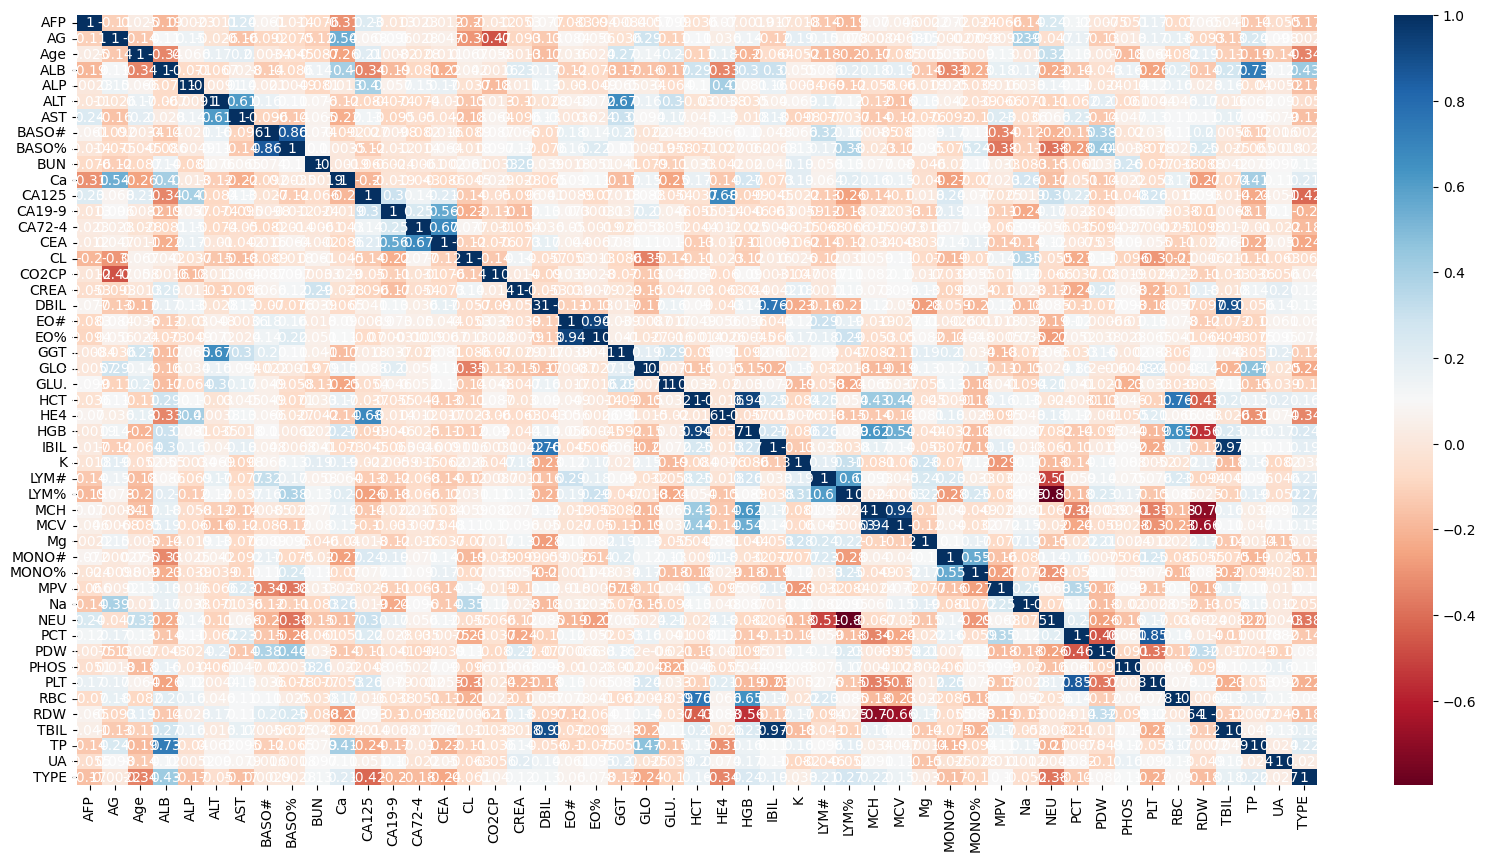

In [ ]:
corr = dt.corr()

plt.figure(figsize=(20,10)) # this sets the size of the figure to width=10 inches, height=8 inches
sns.heatmap(corr, annot=True, cmap='RdBu', annot_kws={"size": 10, "color": "white"})
plt.show()

In [ ]:
#calculate correlation
corr = abs(X.corrwith(y))

# sort correlation values in descending order
corr = corr.sort_values(ascending=False)

# number of top k correlation features
k = 10

# get the top k correlation features
top_k_features = corr.index[:k]
corr_features = top_k_features

plt.figure(figsize=(15,8))
# plot the correlation values in a bar plot
sns.barplot(x=corr.values, y=corr.index)
plt.xlabel('Correlation with target variable')
plt.ylabel('Features')
plt.show()

print("Column names of the {} best features:".format(k))
#print the column names of top k correlation features
print(top_k_features)

Column names of the 10 best features:
Index(['ALB', 'CA125', 'NEU', 'Age', 'HE4', 'LYM%', 'CEA', 'HGB', 'GLO', 'TP'], dtype='object')


***Top 10 Features***

In [ ]:
# number of top k correlation features
k = 10

# get the top k correlation features
top_10_features = corr.index[:k]
corr_features = top_k_features

plt.figure(figsize=(15,8))
# plot the correlation values in a bar plot
#sns.barplot(x=top_k_features.values, y=top_k_features.index)
#plt.xlabel('Correlation with target variable')
#plt.ylabel('Features')
#plt.show()

#print("Column names of the {} best features:".format(k))
#print the column names of top k correlation features
print(top_10_features)

Index(['ALB', 'CA125', 'NEU', 'Age', 'HE4', 'LYM%', 'CEA', 'HGB', 'GLO', 'TP'], dtype='object')


<Figure size 1500x800 with 0 Axes>

***Top 7 Features***

In [ ]:
# number of top k correlation features
k = 7

# get the top k correlation features
top_7_features = corr.index[:k]
corr_features = top_k_features

plt.figure(figsize=(15,8))
# plot the correlation values in a bar plot
#sns.barplot(x=top_k_features.values, y=top_k_features.index)
#plt.xlabel('Correlation with target variable')
#plt.ylabel('Features')
#plt.show()

#print("Column names of the {} best features:".format(k))
#print the column names of top k correlation features
print(top_7_features)

Index(['ALB', 'CA125', 'NEU', 'Age', 'HE4', 'LYM%', 'CEA'], dtype='object')


<Figure size 1500x800 with 0 Axes>

# Classification models and metrics define

In [ ]:
knn= KNeighborsClassifier(n_neighbors=10,n_jobs=-1)
svm= SVC(random_state=10,kernel='rbf')
lr = LogisticRegression()

rf= RandomForestClassifier(n_jobs=-1,random_state=10)
ada= AdaBoostClassifier(random_state=100)

lgbm = LGBMClassifier(n_jobs=-1,random_state=10)
grad = GradientBoostingClassifier()
xg = XGBClassifier(use_label_encoder =False, eval_metric='logloss')

In [ ]:
scores={'accuracy': make_scorer(accuracy_score),
        'recall' : make_scorer(recall_score),
        'specificity':make_scorer(recall_score,pos_label=0),
        'gmean': make_scorer(geometric_mean_score),
        'roc': make_scorer(roc_auc_score),
        'precision': make_scorer(precision_score),
        'mcc':  make_scorer(matthews_corrcoef)
        }

# Performance of classifiers on top 10 features using Corr

In [ ]:
#selected_features = corr[corr> 0.25].index

In [ ]:
#selected_features

# Standardization

In [ ]:
x= dt.drop("TYPE",axis=1)
y= dt["TYPE"]

In [ ]:
x = x[top_10_features]

In [ ]:
x.columns

Index(['ALB', 'CA125', 'NEU', 'Age', 'HE4', 'LYM%', 'CEA', 'HGB', 'GLO', 'TP'], dtype='object')

In [ ]:
label_mapping = {0: 1, 1: 0}
y = y.map(label_mapping)
y.value_counts()

TYPE
0    155
1     75
Name: count, dtype: int64

In [ ]:
scaler= StandardScaler()
xs= scaler.fit_transform(x)

In [ ]:
#RF
score = cross_validate(rf, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            32.077212
score_time           4.323332
test_accuracy       84.347826
test_recall         69.464286
test_specificity    91.416667
test_gmean          79.074294
test_roc            80.440476
test_precision      82.857143
test_mcc            64.525810
dtype: float64

In [ ]:
# knn
score = cross_validate(knn, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.260742
score_time           3.740749
test_accuracy       78.260870
test_recall         36.071429
test_specificity    98.666667
test_gmean          55.552442
test_roc            67.369048
test_precision      86.000000
test_mcc            47.029405
dtype: float64

In [ ]:
# svm
score = cross_validate(svm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.640054
score_time           2.054095
test_accuracy       84.347826
test_recall         58.750000
test_specificity    96.666667
test_gmean          73.597072
test_roc            77.708333
test_precision      91.571429
test_mcc            63.465990
dtype: float64

In [ ]:
# lr
score = cross_validate(lr, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             1.275656
score_time           1.956542
test_accuracy       84.347826
test_recall         62.857143
test_specificity    94.708333
test_gmean          75.898273
test_roc            78.782738
test_precision      87.111111
test_mcc            63.856488
dtype: float64

In [ ]:
# ada
score = cross_validate(ada, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            14.832835
score_time           2.679644
test_accuracy       83.478261
test_recall         72.321429
test_specificity    88.916667
test_gmean          79.714275
test_roc            80.619048
test_precision      77.916667
test_mcc            62.901826
dtype: float64

In [ ]:
# lgbm
score = cross_validate(lgbm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            11.502910
score_time           2.950418
test_accuracy       86.521739
test_recall         75.178571
test_specificity    92.083333
test_gmean          82.840619
test_roc            83.630952
test_precision      83.992063
test_mcc            69.669223
dtype: float64

In [ ]:
# grad
score = cross_validate(grad, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            37.458837
score_time           3.438668
test_accuracy       85.217391
test_recall         73.571429
test_specificity    90.791667
test_gmean          81.082978
test_roc            82.181548
test_precision      81.392857
test_mcc            66.621506
dtype: float64

In [ ]:
# xgboost
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            11.772902
score_time           3.876674
test_accuracy       87.826087
test_recall         75.178571
test_specificity    94.041667
test_gmean          83.805033
test_roc            84.610119
test_precision      87.480159
test_mcc            72.485384
dtype: float64

# Performance of classifiers on top 7 features using Corr

In [ ]:
x= dt.drop("TYPE",axis=1)
y= dt["TYPE"]

In [ ]:
x = x[top_7_features]

In [ ]:
x.columns

Index(['ALB', 'CA125', 'NEU', 'Age', 'HE4', 'LYM%', 'CEA'], dtype='object')

In [ ]:
label_mapping = {0: 1, 1: 0}
y = y.map(label_mapping)
y.value_counts()

TYPE
0    155
1     75
Name: count, dtype: int64

In [ ]:
scaler= StandardScaler()
xs= scaler.fit_transform(x)

In [ ]:
#RF
score = cross_validate(rf, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            31.903648
score_time           5.216639
test_accuracy       85.652174
test_recall         70.714286
test_specificity    92.750000
test_gmean          80.269659
test_roc            81.732143
test_precision      85.238095
test_mcc            67.414494
dtype: float64

In [ ]:
# knn
score = cross_validate(knn, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.331156
score_time           6.207757
test_accuracy       82.608696
test_recall         51.964286
test_specificity    97.333333
test_gmean          68.912588
test_roc            74.648810
test_precision      92.642857
test_mcc            59.121189
dtype: float64

In [ ]:
# svm
score = cross_validate(svm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.703487
score_time           1.853623
test_accuracy       84.347826
test_recall         58.750000
test_specificity    96.666667
test_gmean          73.246388
test_roc            77.708333
test_precision      89.988095
test_mcc            62.821877
dtype: float64

In [ ]:
# lr
score = cross_validate(lr, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.880370
score_time           1.807315
test_accuracy       82.608696
test_recall         56.250000
test_specificity    95.375000
test_gmean          71.691073
test_roc            75.812500
test_precision      86.250000
test_mcc            59.080234
dtype: float64

In [ ]:
# ada
score = cross_validate(ada, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            14.903877
score_time           3.146989
test_accuracy       82.608696
test_recall         69.821429
test_specificity    88.750000
test_gmean          78.150840
test_roc            79.285714
test_precision      79.015568
test_mcc            61.551478
dtype: float64

In [ ]:
# lgbm
score = cross_validate(lgbm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            64.230919
score_time           6.355920
test_accuracy       86.521739
test_recall         75.178571
test_specificity    92.083333
test_gmean          82.656700
test_roc            83.630952
test_precision      83.908730
test_mcc            69.714805
dtype: float64

In [ ]:
# grad
score = cross_validate(grad, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            34.346004
score_time           3.267863
test_accuracy       85.652174
test_recall         73.571429
test_specificity    91.375000
test_gmean          81.420024
test_roc            82.473214
test_precision      83.744589
test_mcc            68.044730
dtype: float64

In [ ]:
# xgboost
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             5.901511
score_time           2.021823
test_accuracy       86.086957
test_recall         73.392857
test_specificity    92.041667
test_gmean          81.849219
test_roc            82.717262
test_precision      85.555556
test_mcc            69.068963
dtype: float64

# Chi Square

Chi Square

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

In [ ]:
X = dt.drop(columns=['TYPE'])
y = dt['TYPE']

In [ ]:
chi2_selector = SelectKBest(chi2, k='all')  # k='all' to get scores for all features
chi2_selector.fit(X, y)

SelectKBest(k='all', score_func=<function chi2 at 0x7d10c0b8f010>)

In [ ]:
chi2_scores = chi2_selector.scores_
chi2_pvalues = chi2_selector.pvalues_

In [ ]:
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'P-value': chi2_pvalues
})

In [ ]:
chi2_results = chi2_results.sort_values(by='Chi2 Score', ascending=False)

In [ ]:
plt.figure(figsize=(12, 10))
plt.barh(chi2_results['Feature'], chi2_results['P-value'], color='steelblue')
plt.xlabel('P-value')
plt.ylabel('Features')
plt.title('Chi2 Scores of Features')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
print(chi2_results)

   Feature    Chi2 Score        P-value
11   CA125  30566.700425   0.000000e+00
25     HE4  10772.944617   0.000000e+00
0      AFP   5353.959136   0.000000e+00
12  CA19-9   3005.156990   0.000000e+00
14     CEA    616.573232  4.159776e-136
42     PLT    263.822946   2.519000e-59
4      ALP    230.998309   3.611021e-52
2      Age     72.533647   1.642083e-17
30    LYM%     59.463290   1.245968e-14
21     GGT     47.709658   4.942509e-12
13  CA72-4     44.933049   2.038875e-11
38     NEU     41.021985   1.505264e-10
3      ALB     26.328805   2.879617e-07
26     HGB     23.123154   1.519499e-06
6      AST     19.331643   1.098704e-05
45    TBIL     10.382495   1.272157e-03
27    IBIL      8.337613   3.883258e-03
22     GLO      7.777993   5.288651e-03
46      TP      7.744133   5.388734e-03
17    CREA      6.278376   1.222200e-02
5      ALT      4.071355   4.361628e-02
31     MCH      2.773647   9.582763e-02
47      UA      2.615330   1.058355e-01
18    DBIL      2.288785   1.303119e-01


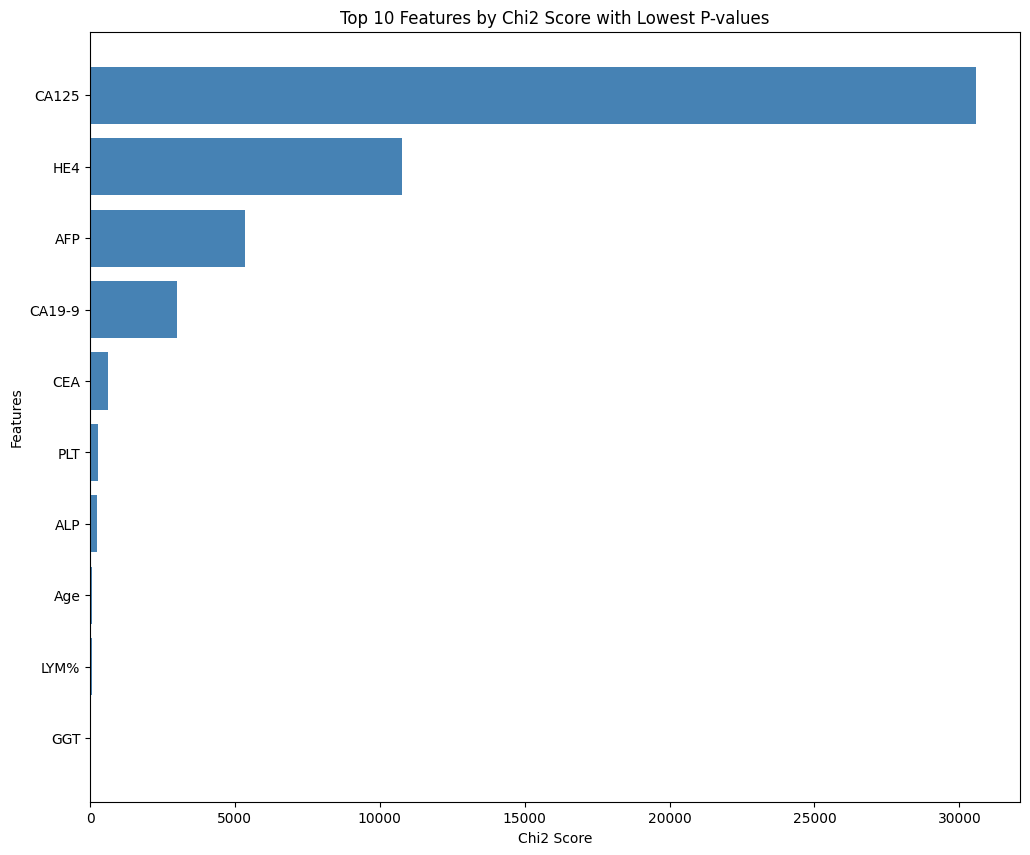

In [ ]:
top_features = chi2_results.sort_values(by='P-value').head(10)

# Plot the top 10 features
plt.figure(figsize=(12, 10))
plt.barh(top_features['Feature'], top_features['Chi2 Score'], color='steelblue')
plt.xlabel('Chi2 Score')
plt.ylabel('Features')
plt.title('Top 10 Features by Chi2 Score with Lowest P-values')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
selected_features_chi = top_features.Feature.tolist()

In [ ]:
selected_features_chi

['CA125', 'HE4', 'AFP', 'CA19-9', 'CEA', 'PLT', 'ALP', 'Age', 'LYM%', 'GGT']

# Performance of classifiers on selected features using Chi Square

In [ ]:
x= dt.drop("TYPE",axis=1)
y= dt["TYPE"]

In [ ]:
x = x[selected_features_chi]

In [ ]:
x.columns

Index(['CA125', 'HE4', 'AFP', 'CA19-9', 'CEA', 'PLT', 'ALP', 'Age', 'LYM%',
       'GGT'],
      dtype='object')

In [ ]:
y.value_counts()

TYPE
1.0    155
0.0     75
Name: count, dtype: int64

In [ ]:
label_mapping = {0: 1, 1: 0}
y = y.map(label_mapping)
y.value_counts()

TYPE
0    155
1     75
Name: count, dtype: int64

In [ ]:
scaler= StandardScaler()
xs= scaler.fit_transform(x)

In [ ]:
#RF
score = cross_validate(rf, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            42.892661
score_time           6.035891
test_accuracy       84.347826
test_recall         65.892857
test_specificity    93.541667
test_gmean          77.608708
test_roc            79.717262
test_precision      82.726190
test_mcc            63.400450
dtype: float64

In [ ]:
# knn
score = cross_validate(knn, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.191138
score_time           3.543568
test_accuracy       78.695652
test_recall         39.107143
test_specificity    98.125000
test_gmean          60.423725
test_roc            68.616071
test_precision      93.000000
test_mcc            50.112562
dtype: float64

In [ ]:
# svm
score = cross_validate(svm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.724068
score_time           2.553430
test_accuracy       80.869565
test_recall         50.892857
test_specificity    95.500000
test_gmean          67.642594
test_roc            73.196429
test_precision      85.380952
test_mcc            54.561826
dtype: float64

In [ ]:
# lr
score = cross_validate(lr, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             1.146979
score_time           1.836934
test_accuracy       86.086957
test_recall         63.035714
test_specificity    97.458333
test_gmean          77.186527
test_roc            80.247024
test_precision      93.988095
test_mcc            68.498739
dtype: float64

In [ ]:
# ada
score = cross_validate(ada, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            24.803376
score_time           4.685030
test_accuracy       78.695652
test_recall         65.892857
test_specificity    85.000000
test_gmean          74.073942
test_roc            75.446429
test_precision      69.264069
test_mcc            51.844887
dtype: float64

In [ ]:
# lgbm
score = cross_validate(lgbm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            14.268296
score_time           4.461842
test_accuracy       85.217391
test_recall         71.428571
test_specificity    92.250000
test_gmean          80.735980
test_roc            81.839286
test_precision      82.107143
test_mcc            66.194849
dtype: float64

In [ ]:
# grad
score = cross_validate(grad, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            20.083976
score_time           1.830325
test_accuracy       84.347826
test_recall         71.250000
test_specificity    90.958333
test_gmean          79.944361
test_roc            81.104167
test_precision      79.761905
test_mcc            64.210905
dtype: float64

In [ ]:
# xgboost
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            13.144968
score_time           4.174414
test_accuracy       83.913043
test_recall         71.071429
test_specificity    90.333333
test_gmean          79.788996
test_roc            80.702381
test_precision      78.654762
test_mcc            63.221727
dtype: float64